In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm

Read Data

In [2]:
import os
import pandas as pd
from tqdm import tqdm

# Path to the dataset folder
dataset_folder = 'C:/Users/TODAY/VSCode/Deteksi/dataset'

images = []
labels = []

# Loop through subfolders in the dataset folder
for subfolder in tqdm(os.listdir(dataset_folder)):
    subfolder_path = os.path.join(dataset_folder, subfolder)

    # Check if it's a directory and not the root directory
    if not os.path.isdir(subfolder_path) or subfolder == 'C:/Users/TODAY/VSCode/Deteksi':
        continue

    # Loop through image files in the subfolder
    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)
        labels.append(subfolder)

# Create a DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

# Display the DataFrame
print(df)


100%|██████████| 26/26 [00:00<00:00, 223.84it/s]


                                                 image label
0      C:/Users/TODAY/VSCode/Deteksi/dataset\A\A_0.jpg     A
1      C:/Users/TODAY/VSCode/Deteksi/dataset\A\A_1.jpg     A
2     C:/Users/TODAY/VSCode/Deteksi/dataset\A\A_10.jpg     A
3     C:/Users/TODAY/VSCode/Deteksi/dataset\A\A_11.jpg     A
4     C:/Users/TODAY/VSCode/Deteksi/dataset\A\A_12.jpg     A
...                                                ...   ...
2595  C:/Users/TODAY/VSCode/Deteksi/dataset\Z\Z_95.jpg     Z
2596  C:/Users/TODAY/VSCode/Deteksi/dataset\Z\Z_96.jpg     Z
2597  C:/Users/TODAY/VSCode/Deteksi/dataset\Z\Z_97.jpg     Z
2598  C:/Users/TODAY/VSCode/Deteksi/dataset\Z\Z_98.jpg     Z
2599  C:/Users/TODAY/VSCode/Deteksi/dataset\Z\Z_99.jpg     Z

[2600 rows x 2 columns]


In [3]:
df = pd.DataFrame({'image': images, 'label': labels})

print(df.dtypes)

image    object
label    object
dtype: object


In [6]:
from PIL import Image
import os

def cek_ukuran_dan_jenis_gambar(folder_path):
    # Loop melalui semua file di folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Hanya memproses file gambar (misalnya, JPEG, PNG, dll.)
        if not os.path.isfile(file_path) or not file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue

        # Baca informasi ukuran dan jenis gambar
        with Image.open(file_path) as img:
            width, height = img.size
            image_mode = img.mode

            # Cek apakah gambar grayscale atau RGB
            jenis_gambar = "Grayscale" if image_mode == "L" else "RGB"
            
            print(f"{filename}: {width} x {height} pixels, Mode: {jenis_gambar}")

if __name__ == "__main__":
    folder_path = "C:/Users/TODAY/VSCode/Deteksi/dataset/A"
    cek_ukuran_dan_jenis_gambar(folder_path)


A_0.jpg: 640 x 480 pixels, Mode: RGB
A_1.jpg: 640 x 480 pixels, Mode: RGB
A_10.jpg: 640 x 480 pixels, Mode: RGB
A_11.jpg: 640 x 480 pixels, Mode: RGB
A_12.jpg: 640 x 480 pixels, Mode: RGB
A_13.jpg: 640 x 480 pixels, Mode: RGB
A_14.jpg: 640 x 480 pixels, Mode: RGB
A_15.jpg: 640 x 480 pixels, Mode: RGB
A_16.jpg: 640 x 480 pixels, Mode: RGB
A_17.jpg: 640 x 480 pixels, Mode: RGB
A_18.jpg: 640 x 480 pixels, Mode: RGB
A_19.jpg: 640 x 480 pixels, Mode: RGB
A_2.jpg: 640 x 480 pixels, Mode: RGB
A_20.jpg: 640 x 480 pixels, Mode: RGB
A_21.jpg: 640 x 480 pixels, Mode: RGB
A_22.jpg: 640 x 480 pixels, Mode: RGB
A_23.jpg: 640 x 480 pixels, Mode: RGB
A_24.jpg: 640 x 480 pixels, Mode: RGB
A_25.jpg: 640 x 480 pixels, Mode: RGB
A_26.jpg: 640 x 480 pixels, Mode: RGB
A_27.jpg: 640 x 480 pixels, Mode: RGB
A_28.jpg: 640 x 480 pixels, Mode: RGB
A_29.jpg: 640 x 480 pixels, Mode: RGB
A_3.jpg: 640 x 480 pixels, Mode: RGB
A_30.jpg: 640 x 480 pixels, Mode: RGB
A_31.jpg: 640 x 480 pixels, Mode: RGB
A_32.jpg: 640 x 

Visualization of Dataset

C:\Users\TODAY\AppData\Local\Temp\ipykernel_1304\4095864232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label,palette='Set1')


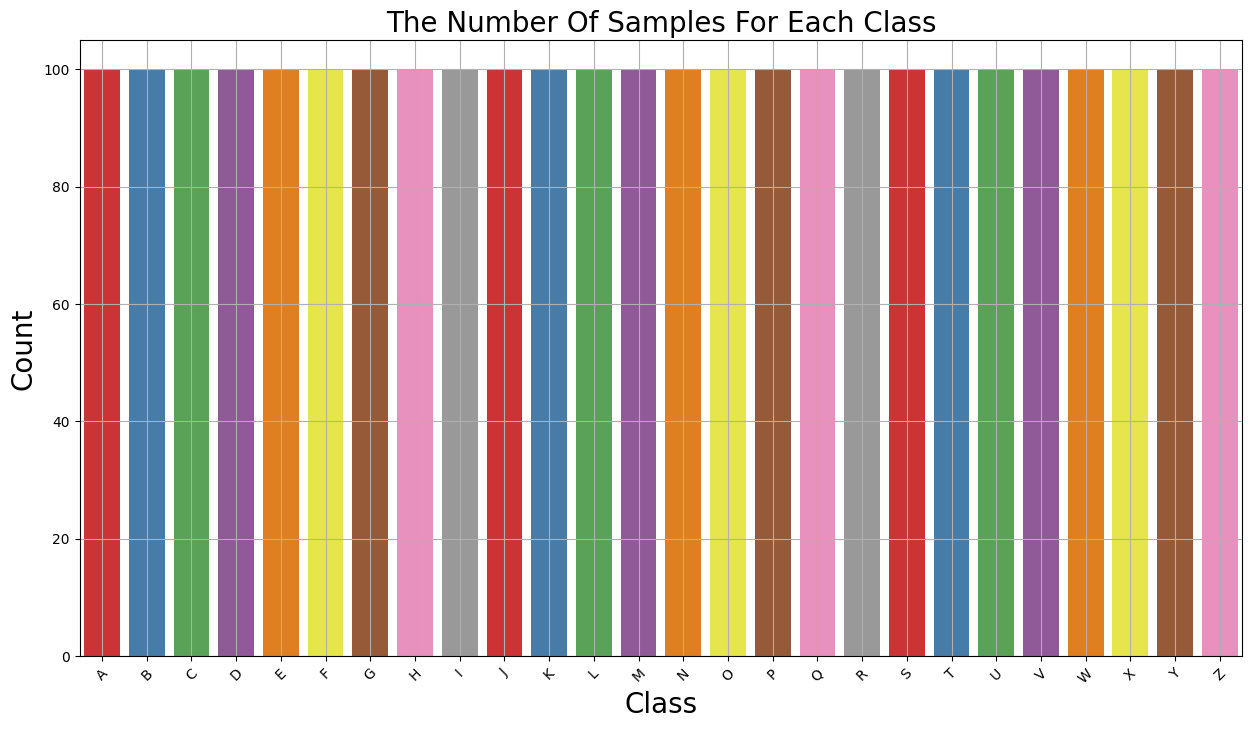

In [7]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

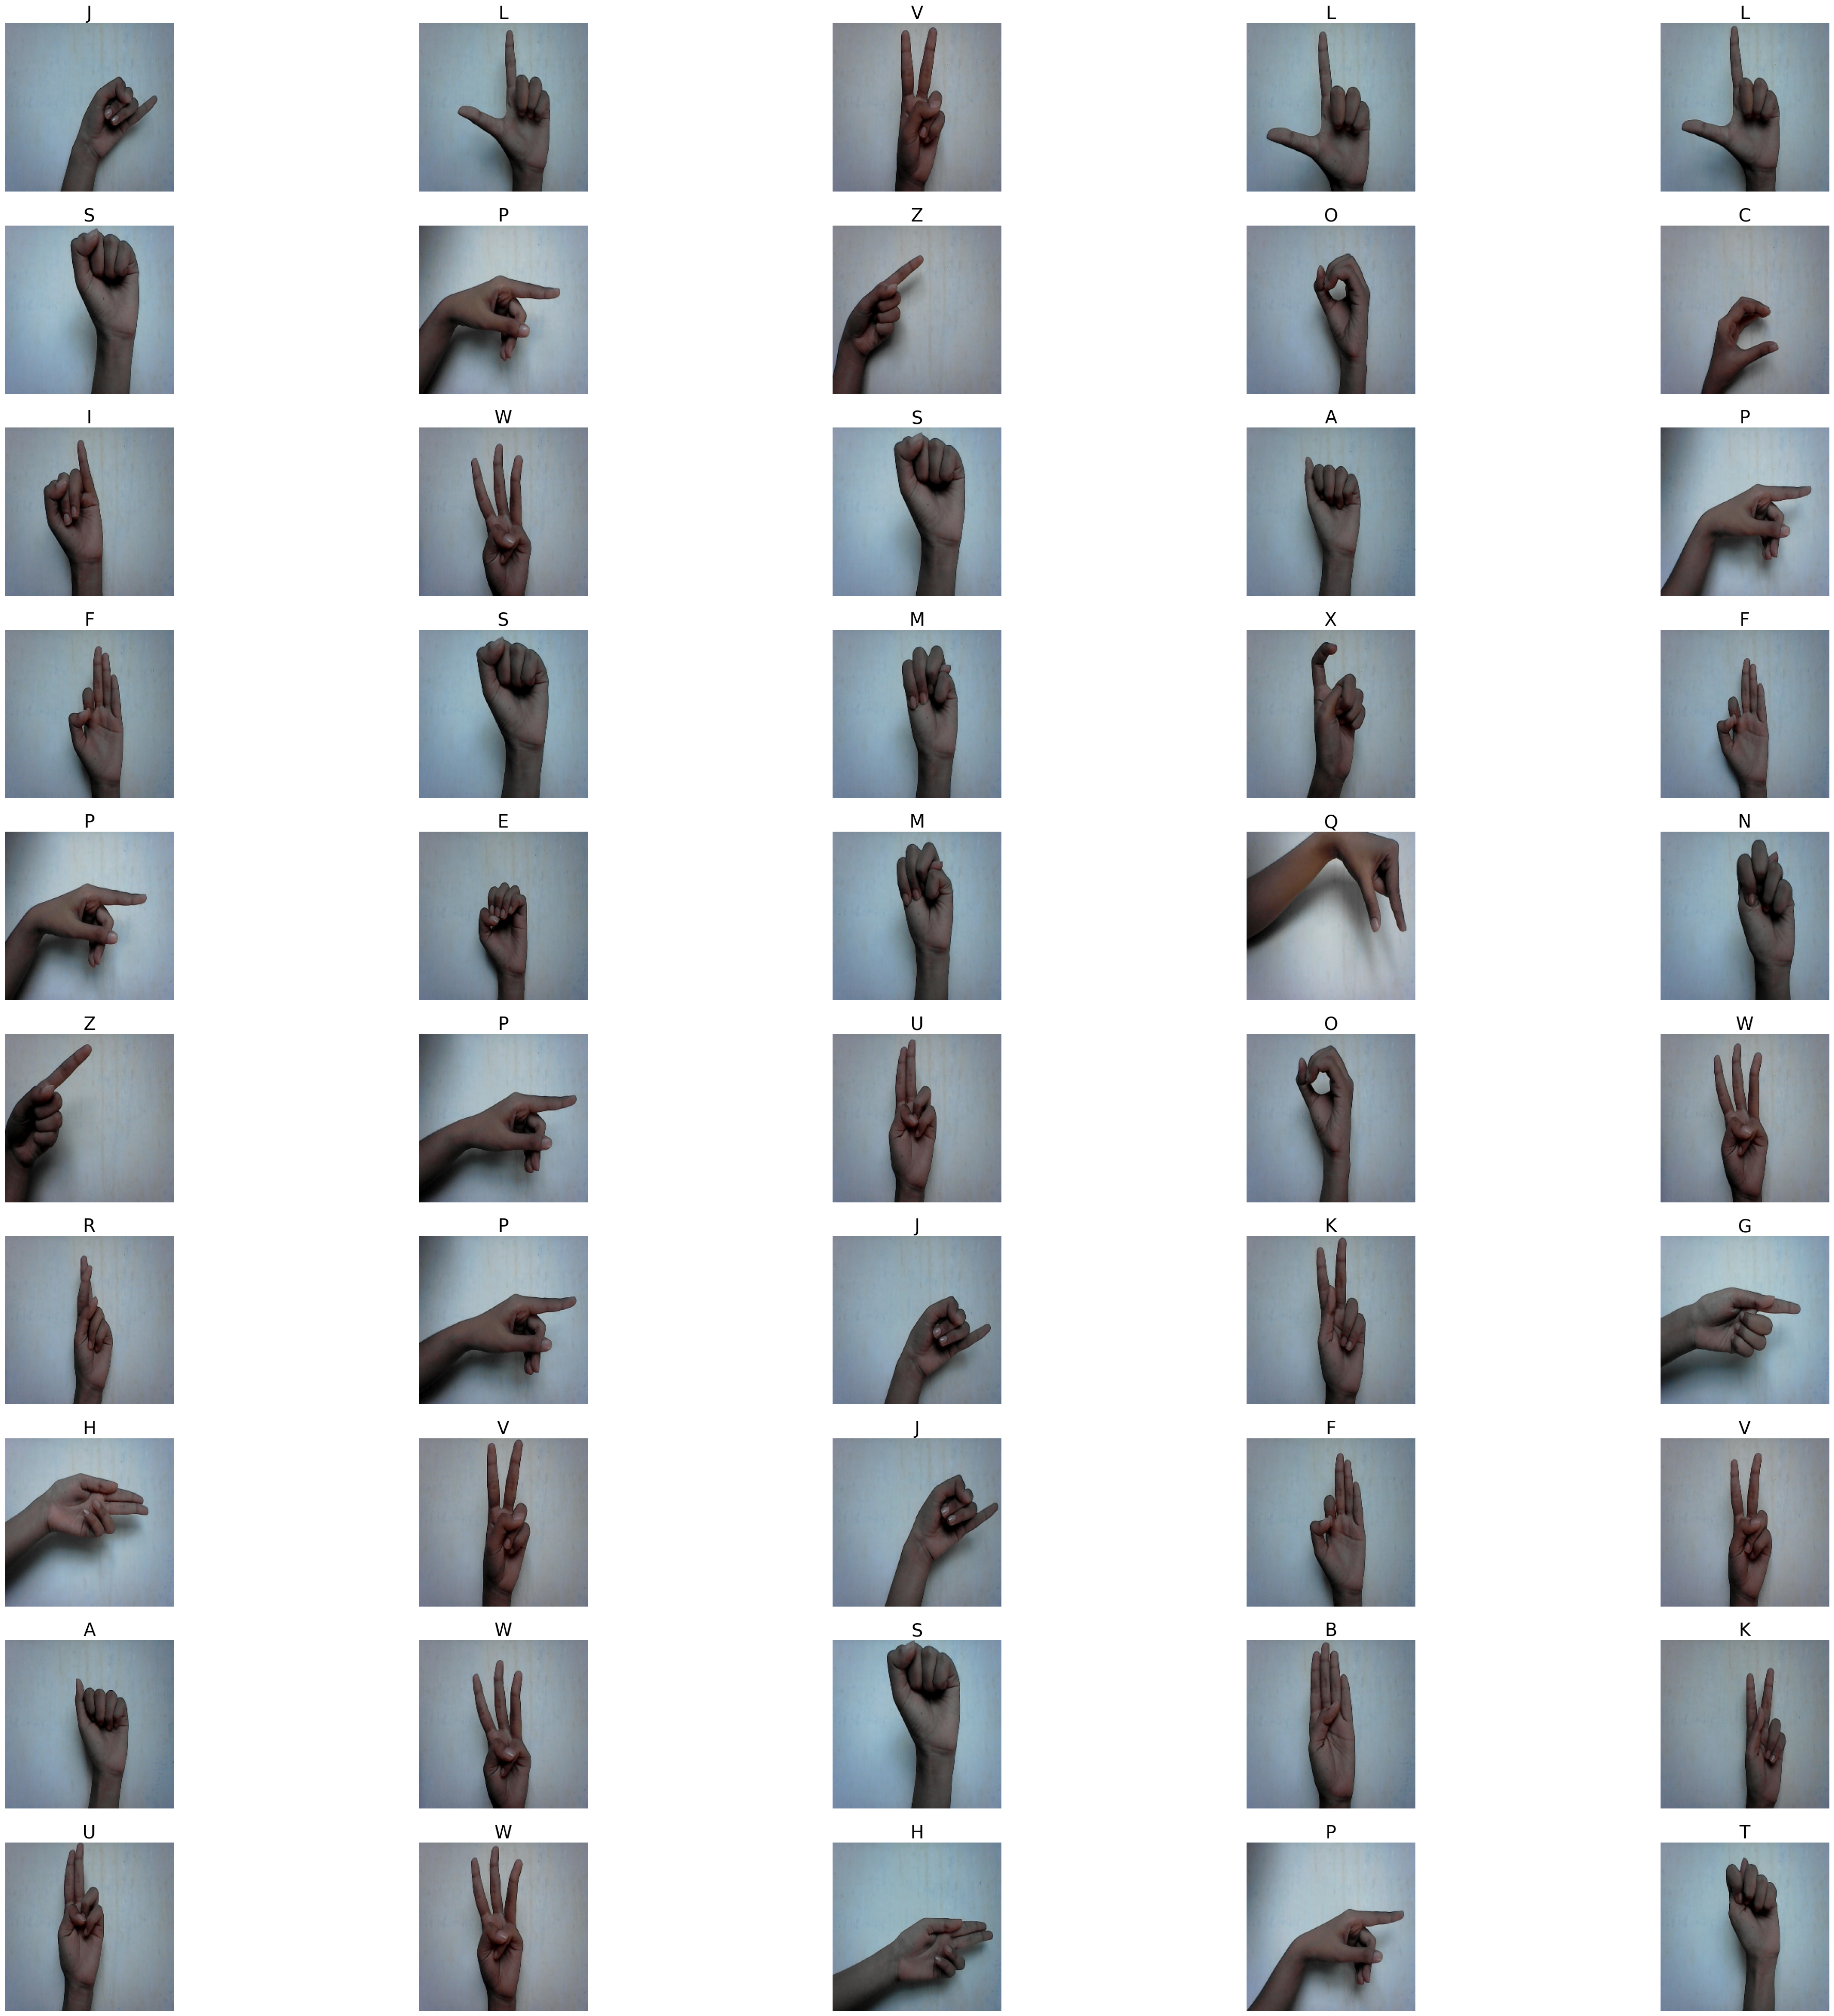

In [8]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)

Data Augmentation

In [9]:
X_train, X_test1, y_train, y_test1 = train_test_split(df['image'], df['label'], test_size=0.3, random_state=42,shuffle=True,stratify=df['label'])
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [10]:
image_size = (224,224)
batch_size = 32
datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)
val_generator = datagen.flow_from_dataframe(
    df_val,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 1820 validated image filenames belonging to 26 classes.
Found 390 validated image filenames belonging to 26 classes.
Found 390 validated image filenames belonging to 26 classes.


In [11]:
dict_=train_generator.class_indices
def get_Name(N):
    for x,y in dict_.items():
        if y==N:
            return x
get_Name(10)

'K'

MobileNetV2 Modeling 

In [12]:
model_MobileNet = tf.keras.applications.MobileNetV2(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'
)
model_MobileNet.trainable = False

# Membuat model dengan input dari gambar
input_layer = tf.keras.layers.Input(shape=(224, 224, 3))
x = model_MobileNet(input_layer, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
output = tf.keras.layers.Dense(36, activation='softmax')(x)

model_MobileNet = tf.keras.Model(inputs=[input_layer], outputs=[output])

# Menampilkan ringkasan model
model_MobileNet.summary()



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 256)               16056576  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 36)                9252      
                                                           

In [32]:
import matplotlib.pyplot as plt

# Menentukan parameter pelatihan
batch_size = 32
num_epochs = 10  

# Menentukan optimizer, fungsi loss, dan metrik evaluasi
model_MobileNet.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

# Melatih model
history = model_MobileNet.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator,
    batch_size=batch_size,
    callbacks=[early_stopping_cb, checkpoint_cb]
)

# Menampilkan akurasi pelatihan dan validasi
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Membuat plot diagram akurasi
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Evaluate The Model 

In [ ]:
# Periksa generator sebelum evaluasi
for data_batch, labels_batch in test_generator:
    print("Data Batch Shape:", data_batch.shape)
    print("Labels Batch Shape:", labels_batch.shape)
    break

# Evaluasi model pada dataset uji
evaluation = model_MobileNet.evaluate(test_generator)

# Menampilkan hasil evaluasi
print("Test Accuracy:", evaluation[1])

# Pastikan dimensi prediksi sesuai dengan apa yang diharapkan oleh classification_report
y_pred = model_MobileNet.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mengambil label sebenarnya dari generator
y_true = test_generator.classes

# Menampilkan classification report
print(classification_report(y_true, y_pred_classes))

error 


In [44]:
score, acc= model_MobileNet.evaluate(test_generator)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 1s 110ms/step - loss: 0.1763 - accuracy: 0.9436
Test Loss = 0.17632651329040527
Test Accuracy = 0.9436274766921997


In [45]:
y_test =test_generator.classes
predictions = model_MobileNet.predict(test_generator)
y_pred = np.argmax(predictions,axis=1)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

13/13 [==============================] - 2s 78ms/step


Actual  Prediction
0         1           1
1        34          34
2        20          20
3        17          17
4        35          35
..      ...         ...
403       6           6
404      21          21
405       1           1
406       1           1
407      11          11

[408 rows x 2 columns]

array([[10,  0,  0, ...,  0,  0,  0],
       [ 0, 11,  0, ...,  0,  0,  0],
       [ 0,  0, 11, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ...,  0, 11,  0],
       [ 0,  2,  0, ...,  0,  0,  8]])

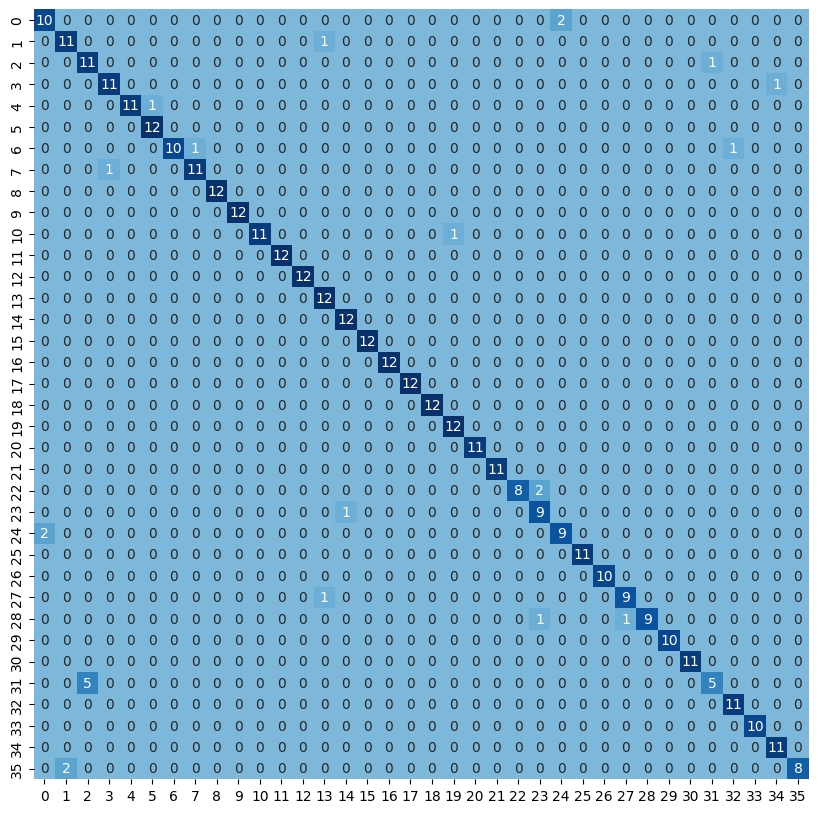

In [47]:
plt.figure(figsize=(10,10))
CM = confusion_matrix(y_test,y_pred)
sns.heatmap(CM,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [48]:
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.85      0.92      0.88        12
           2       0.69      0.92      0.79        12
           3       0.92      0.92      0.92        12
           4       1.00      0.92      0.96        12
           5       0.92      1.00      0.96        12
           6       1.00      0.83      0.91        12
           7       0.92      0.92      0.92        12
           8       1.00      1.00      1.00        12
           9       1.00      1.00      1.00        12
          10       1.00      0.92      0.96        12
          11       1.00      1.00      1.00        12
          12       1.00      1.00      1.00        12
          13       0.86      1.00      0.92        12
          14       0.92      1.00      0.96        12
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00        12

Simpan Model, Lalu di Konversi ke tflite.

In [ ]:
import tensorflow as tf

# Load model
model = tf.keras.models.load_model('ASL_model.h5')

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('ASL_model.tflite', 'wb') as f:
    f.write(tflite_model)
